# Simple Linear Regression- Empolyee dataset

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [64]:
df=pd.read_csv("C:\\Users\\delll\\Desktop\\Python\\DataSets\\emp_data.csv")
df.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [65]:
df.shape
#row=10 and columns=2

(10, 2)

In [5]:
df.dtypes

Salary_hike       int64
Churn_out_rate    int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [7]:
df.isnull().sum()
# no null record

Salary_hike       0
Churn_out_rate    0
dtype: int64

In [8]:
df.describe()
# The average salary hike is 1688 Rs.,minimum is 1580 Rs. and maximum is 1870.
# The average churn out rate of empoyee is 72.90% ,minimum is 60% Rs. and maximum is 92%.

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


### Univariate analysis

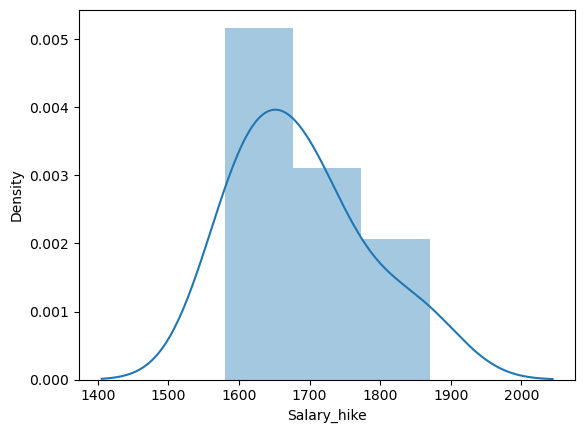

In [9]:
# draw histogram for Salary_hike
sns.distplot(df["Salary_hike"])
plt.show()
# data is right skewed

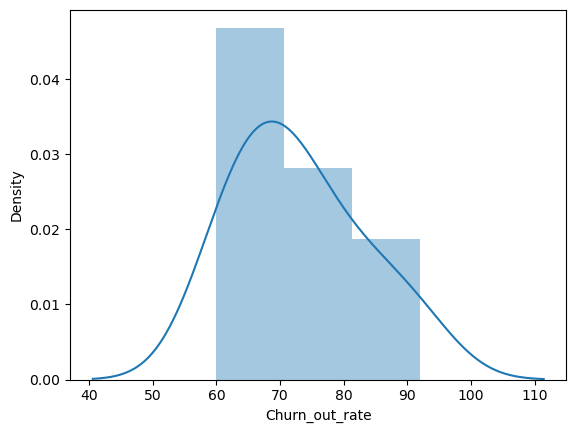

In [10]:
# draw histogram for Churn_out_rate
sns.distplot(df["Churn_out_rate"])
plt.show()
# data is right skewed

In [11]:
# to make it normal use log transformation
df1=df.copy()
df1

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [17]:
df1["Salary_hike"]=np.log(df["Salary_hike"])
df1["Churn_out_rate"]=np.log(df["Churn_out_rate"])

In [18]:
df1.head()

,Salary_hike,Churn_out_rate
0,7.365180,4.521789
1,7.377759,4.442651
2,7.383989,4.382027
3,7.402452,4.317488
4,7.414573,4.276666


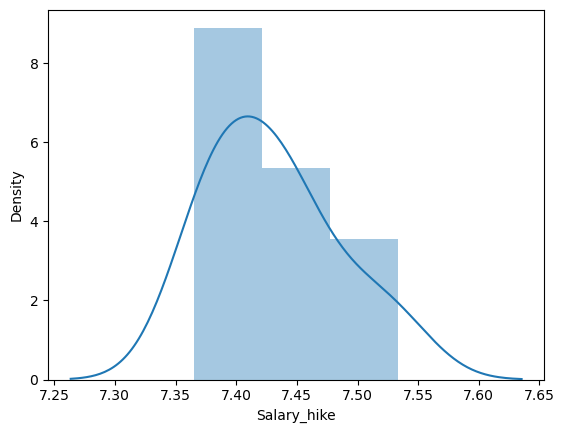

In [19]:
# draw histogram for Salary_hike
sns.distplot(df1["Salary_hike"])
plt.show()
# data is right skewed

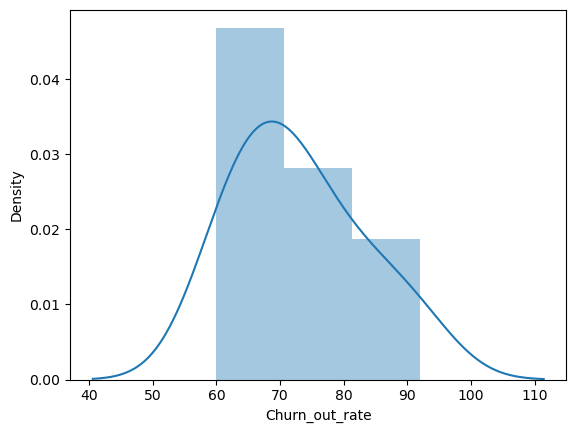

In [20]:
# draw histogram for Salary_hike
sns.distplot(df["Churn_out_rate"])
plt.show()
# data is right skewed

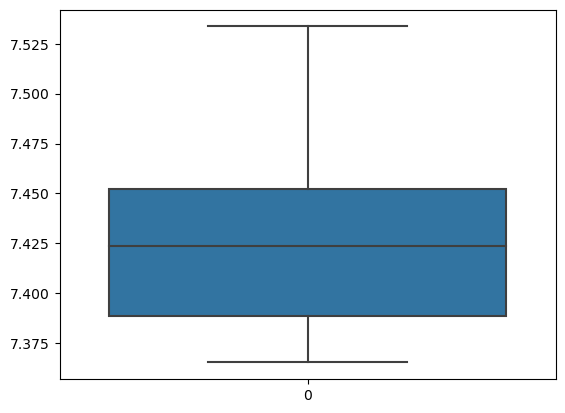

In [23]:
sns.boxplot(df1["Salary_hike"])
plt.show()
# no outliers are present

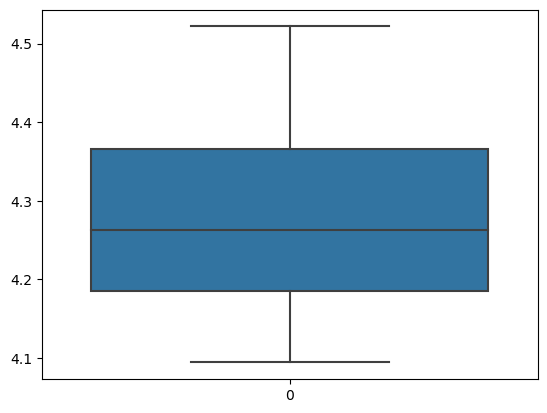

In [24]:
sns.boxplot(df1["Churn_out_rate"])
plt.show()
# no outliers are present

### Bivariate Analysis

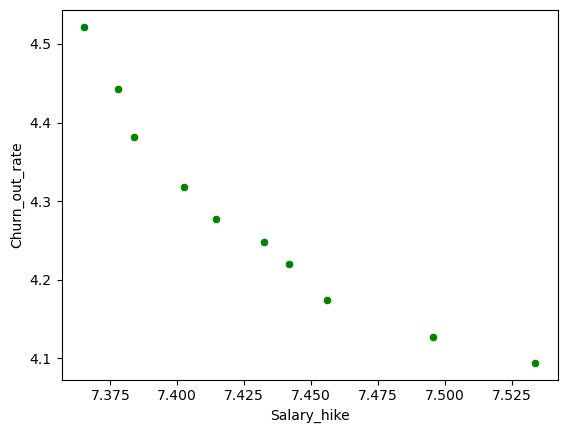

In [25]:
# draw scatter plot for Salary_hike vs Churn_out_rate
sns.scatterplot(x=df1["Salary_hike"],y=df1["Churn_out_rate"],color="g")
plt.show()
# from graph we can see that if salary hike is increasing then churn out rate is decreasing

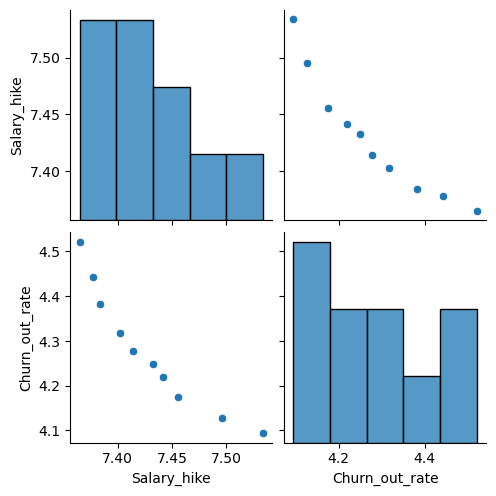

In [28]:
# draw pairplot for dataframe
sns.pairplot(df1)
plt.show()

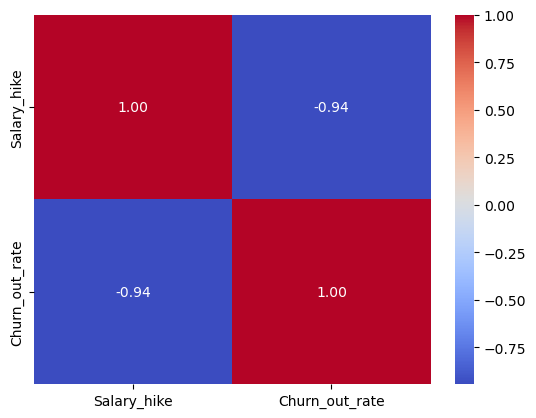

In [35]:
sns.heatmap(df1.corr(),cmap="coolwarm",annot=True,fmt="0.02f")
plt.show()
# This graph clearly shows that Salary_hike and Churn_out_rate have strong negative correlation.
# Because value of correlation coeff is 0.94>0.8.

### Build Model

In [66]:
model=LinearRegression()
model.fit(df[["Salary_hike"]],df["Churn_out_rate"])

LinearRegression()

In [54]:
model.score(x_test,y_test)

0.72775390625

#### churn_rate = m*salary_hike + c

In [58]:
model.coef_
# value of slope(m)= -0.10

array([-0.10154265])

In [59]:
model.intercept_
# value of y_intercept(c)=244.36

244.36491110400797

In [60]:
df.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [61]:
rate=(-0.10154265*1580)+244.36491110400797
rate

83.92752410400797

In [67]:
model.predict([[1580]])

array([83.9275313])

In [68]:
model.predict([[1610]])

array([80.88125193])

In [69]:
# predict the churn rate for salary hike 2300 Rs. 
rate=(-0.10154265*2300)+244.36491110400797
rate

10.816816104007984

In [72]:
# predict the churn rate for salary hike 1500 Rs. 
rate=(-0.10154265*1500)+244.36491110400797
rate

92.05093610400797